In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from get_iris import *

# Imagen de ejemplo

In [2]:
db_path = '../CASIA-IrisV3'
db_path_interval = db_path + '/CASIA-Iris-Interval'
db_path_lamp     = db_path + '/CASIA-Iris-Lamp'
db_path_twins    = db_path + '/CASIA-Iris-Twins'

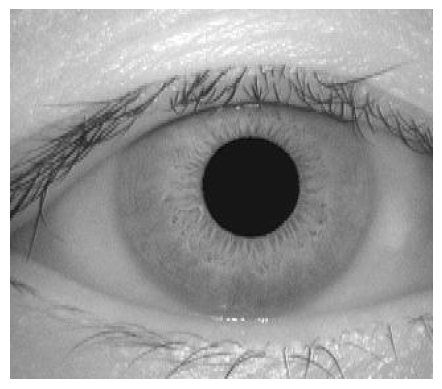

In [3]:
path_ex_casiav1 = '../CASIA-IrisV1/1/001_1_1.jpg'
path_ex_casiav3 =  db_path_lamp + '/005/L/S2005L03.jpg'
img1_ex = cv2.imread(path_ex_casiav1, 0)

plt.imshow(img1_ex, cmap='gray')
plt.axis('off')
plt.show()

# Extracción de información desde el iris

Inner circle (x,y,r) = (182.0, 134.0, 37)
Outer circle (x,y,r) = (180.0, 137.0, 99)


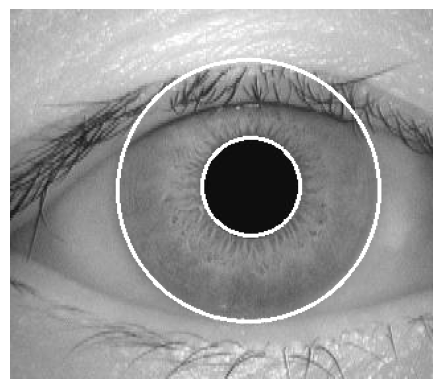

In [4]:
# python-iris-recognition/iris/python/fnc/boundary.py
y_inn, x_inn, r_inn = searchInnerBound(img1_ex)
y_out, x_out, r_out = searchOuterBound(img1_ex, y_inn, x_inn, r_inn)
print(f'Inner circle (x,y,r) = {(x_inn, y_inn, r_inn)}')
print(f'Outer circle (x,y,r) = {(x_out, y_out, r_out)}')

img2_ex = img1_ex.copy()
cv2.circle(img2_ex, (int(x_inn), int(y_inn)), r_inn, (255), thickness=2)
cv2.circle(img2_ex, (int(x_out), int(y_out)), r_out, (255), thickness=2)
plt.imshow(img2_ex, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
segment(img1_ex)

([137, 180, 99],
 [134, 182, 37],
 array([[173., 171., 170., ..., 179., 184., 170.],
        [172., 170., 170., ..., 186., 184., 171.],
        [173., 172., 171., ..., 196., 185., 172.],
        ...,
        [156., 154., 152., ..., 172., 183., 194.],
        [156., 154., 151., ..., 170., 180., 191.],
        [155., 153., 150., ..., 169., 176., 185.]]))

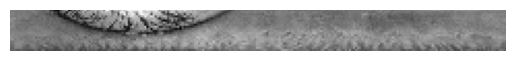

(20, 240)


In [6]:
norm = normalize(img1_ex, x_inn, y_inn, r_inn, x_out, y_out, r_out, 20, 240)
plt.imshow(norm[0], cmap='gray')
plt.axis('off')
plt.show()
print(norm[0].shape)

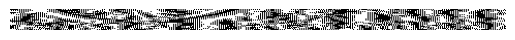

(20, 480)


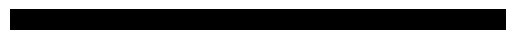

(20, 480)


In [7]:
enc = encode(norm[0], norm[1], minWaveLength, mult, sigmaOnf)

plt.imshow(enc[0],cmap='gray')
plt.axis('off')
plt.show()
print(enc[0].shape)

# Solo son 0s?
plt.imshow(enc[1],cmap='gray')
plt.axis('off')
plt.show()
print(enc[1].shape)

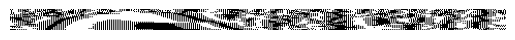

[[  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]
 [255   0 255 ...   0 255   0]
 ...
 [255 255   0 ... 255 255 255]
 [255 255 255 ...   0 255   0]
 [  0   0   0 ... 255   0 255]]


In [8]:
gi = get_iris(path_ex_casiav1)
plt.imshow(gi,cmap='gray')
plt.axis('off')
plt.show()
print(gi)

# Acceso a directorios de imágenes

In [16]:
# import os
# from PIL import Image
# from get_iris import *

# # Selección de subconjunto
# n = 0
# subsets = ['CASIA-Iris-Interval', 'CASIA-Iris-Lamp', 'CASIA-Iris-Twins']

# # Ruta base de CASIA-IrisV3
# base_path     = os.path.join(os.path.dirname(os.getcwd()), "CASIA-IrisV3")
# new_base_path = os.path.join(os.path.dirname(os.getcwd()), "database_V3")

# # Recorrido de imagenes
# for root, _, files in os.walk(os.path.join(base_path, subsets[n])):
#     for file in files:
#         if file.endswith(('.jpg')):
#             img_path = os.path.join(root, file)
#             encoded_img = get_iris(img_path)

#             relative_path = os.path.relpath(root, base_path)
#             new_path = os.path.join(new_base_path, relative_path)

#             os.makedirs(new_path, exist_ok=True)
#             new_img_path = os.path.join(new_path, file)

#             img = Image.fromarray(encoded_img)
#             img.save(new_img_path)
#             print(f"Image saved as: {new_img_path}")

In [17]:
# import os
# from PIL import Image
# from get_iris import *

# # Selección de subconjunto
# n = 1
# subsets = ['CASIA-Iris-Interval', 'CASIA-Iris-Lamp', 'CASIA-Iris-Twins']

# # Ruta base de CASIA-IrisV3
# base_path     = os.path.join(os.path.dirname(os.getcwd()), "CASIA-IrisV3")
# new_base_path = os.path.join(os.path.dirname(os.getcwd()), "database_V3")

# # Recorrido de imagenes
# for root, _, files in os.walk(os.path.join(base_path, subsets[n])):
#     for file in files:
#         if file.endswith(('.jpg')):
#             img_path = os.path.join(root, file)
#             encoded_img = get_iris(img_path)

#             relative_path = os.path.relpath(root, base_path)
#             new_path = os.path.join(new_base_path, relative_path)

#             os.makedirs(new_path, exist_ok=True)
#             new_img_path = os.path.join(new_path, file)

#             img = Image.fromarray(encoded_img)
#             img.save(new_img_path)
#             print(f"Image saved as: {new_img_path}")

In [18]:
# import os
# from PIL import Image
# from get_iris import *

# # Selección de subconjunto
# n = 2
# subsets = ['CASIA-Iris-Interval', 'CASIA-Iris-Lamp', 'CASIA-Iris-Twins']

# # Ruta base de CASIA-IrisV3
# base_path     = os.path.join(os.path.dirname(os.getcwd()), "CASIA-IrisV3")
# new_base_path = os.path.join(os.path.dirname(os.getcwd()), "database_V3")

# # Recorrido de imagenes
# for root, _, files in os.walk(os.path.join(base_path, subsets[n])):
#     for file in files:
#         if file.endswith(('.jpg')):
#             img_path = os.path.join(root, file)
#             encoded_img = get_iris(img_path)

#             relative_path = os.path.relpath(root, base_path)
#             new_path = os.path.join(new_base_path, relative_path)

#             os.makedirs(new_path, exist_ok=True)
#             new_img_path = os.path.join(new_path, file)

#             img = Image.fromarray(encoded_img)
#             img.save(new_img_path)
#             print(f"Image saved as: {new_img_path}")